## Salary Trends Analysis

#In this project, we delve into a dataset of salary information across various roles, experience levels, and remote work categories.
#Our goal is to uncover a few insights on how these factors influence salary trends.


##Uploading and viewing the data

#This dataset from ai-jobs.net gives salary information, remote percentage, company size, and more from 2020-2024.

In [1]:
import pandas as pd

file_path = r'C:\Users\joshu\OneDrive\Desktop\Portfolio\Projects\DataSalaries\salaries.csv'
data = pd.read_csv(file_path)


In [2]:
data.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,BI Developer,106100,USD,106100,US,0,US,M
1,2024,MI,FT,BI Developer,74300,USD,74300,US,0,US,M
2,2024,MI,FT,Data Engineer,143000,USD,143000,US,0,US,M
3,2024,MI,FT,Data Engineer,102000,USD,102000,US,0,US,M
4,2024,SE,FT,Data Scientist,214500,USD,214500,US,0,US,M


##Salary Trends Over Time

#This shows the average salary across all experience levels and remote work rations by year. Here, we see a large dip in salaries in 2021, which is likely attributable to the pandemic. 2022 shows an overcorrecting the continued through 2023.  We're only a quarter of the way through 2024 so there's no concrete determinations to be made as of yet but it seems like a stabalization of salaries post-pandemic.

In [3]:
# Group the data by work year and calculate the average salary in USD for each year
average_salaries_by_year = data.groupby('work_year')['salary_in_usd'].mean().reset_index()

# Sort the results by work year 
average_salaries_by_year = average_salaries_by_year.sort_values('work_year')

average_salaries_by_year


,work_year,salary_in_usd
0,2020,102250.866667
1,2021,99922.073394
2,2022,134404.072034
3,2023,153732.664632
4,2024,152039.793276


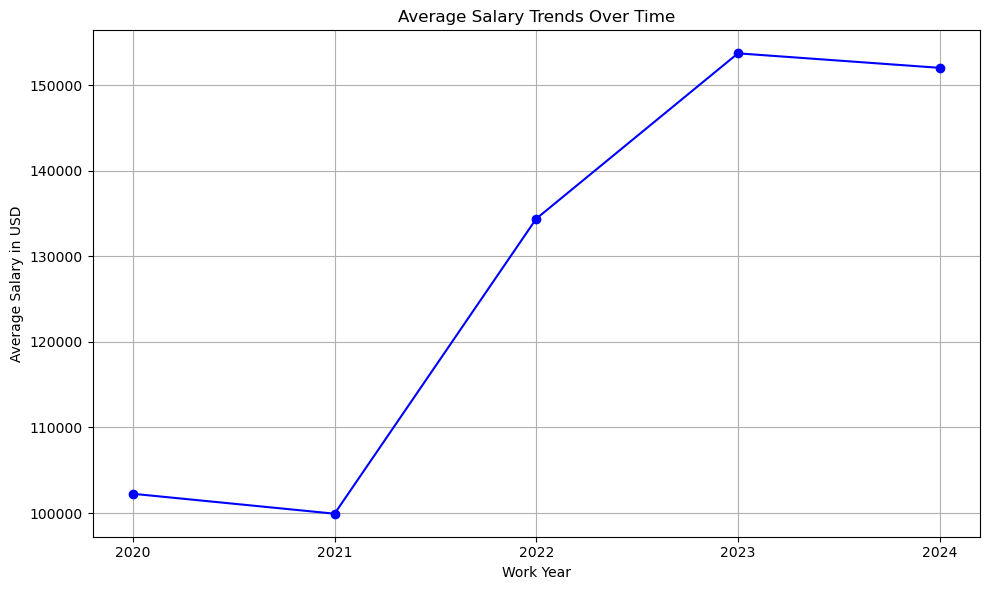

In [4]:
import matplotlib.pyplot as plt

# Plotting the average salaries over time
plt.figure(figsize=(10, 6))
plt.plot(average_salaries_by_year['work_year'], average_salaries_by_year['salary_in_usd'], marker='o', linestyle='-', color='b')
plt.title('Average Salary Trends Over Time')
plt.xlabel('Work Year')
plt.ylabel('Average Salary in USD')
plt.grid(True)
plt.xticks(average_salaries_by_year['work_year'])  # Ensure all years are shown as x-ticks
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()


##Impact of Experience Level on Salary

#Same as before but instead of year, we're looking at increases by experience level. In this, the biggest persentage increase would be from entry-level (EN) to mid-level (MI) at nearly a 37% increase. Numerically, senior-level (SE) positions gain the most at about 38.5K per year.

In [5]:
# Group the data by experience level and calculate the average salary in USD for each level
average_salaries_by_experience = data.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Sort the results by average salary in ascending order for better visualization later
average_salaries_by_experience = average_salaries_by_experience.sort_values('salary_in_usd')

average_salaries_by_experience


,experience_level,salary_in_usd
0,EN,91756.573226
2,MI,125455.384121
3,SE,163691.057453
1,EX,194018.722353


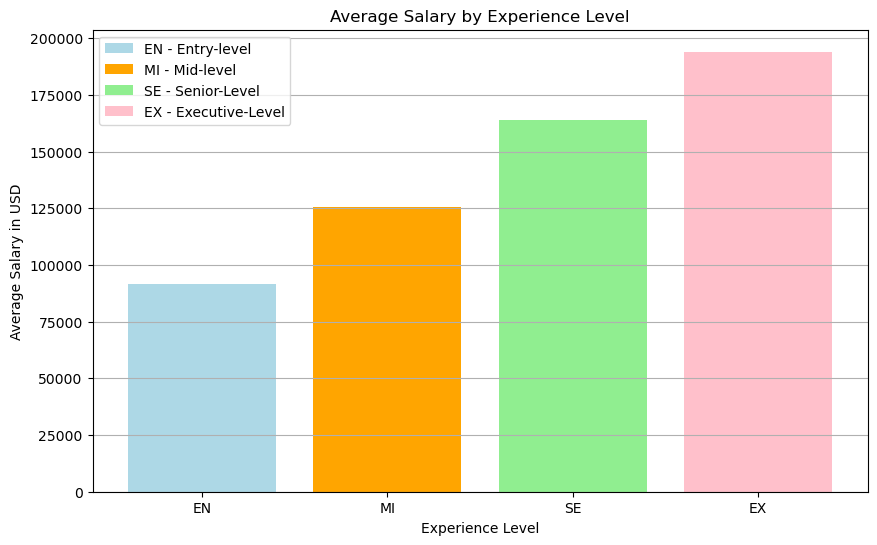

In [6]:
# Changing colors in the bars and creating a legend
colors = ['lightblue', 'orange', 'lightgreen', 'pink']  # Different colors for each experience level
labels = ['EN - Entry-level', 'MI - Mid-level', 'SE - Senior-Level', 'EX - Executive-Level']  # Labels for the legend

plt.figure(figsize=(10, 6))
bars = plt.bar(average_salaries_by_experience['experience_level'], average_salaries_by_experience['salary_in_usd'], color=colors)

plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.grid(axis='y')

# Adding a legend
plt.legend(bars, labels)

plt.show()


##Remote Work's Effect on Salary

#Same as before, but now we're looking at the difference between onsite, hybrid, and fully remote positions. Initial analysis shows that hybrid configurations pay almost 50% less than fully or no remote positions. This is consistent across experience levels as well.

In [7]:
# Categorizing the jobs based on their remote_ratio
def categorize_remote_ratio(row):
    if row['remote_ratio'] == 0:
        return '0% Remote (On-site)'
    elif row['remote_ratio'] == 100:
        return '100% Remote'
    else:
        return 'Partial Remote'

data['remote_category'] = data.apply(categorize_remote_ratio, axis=1)

# Grouping the data by the new remote_category column and calculating the average salary
average_salaries_by_remote = data.groupby('remote_category')['salary_in_usd'].mean().reset_index()

# Sorting the results for better visualization
average_salaries_by_remote = average_salaries_by_remote.sort_values('salary_in_usd')

average_salaries_by_remote


,remote_category,salary_in_usd
2,Partial Remote,81863.715447
1,100% Remote,145272.808057
0,0% Remote (On-site),154012.935683


C:\Users\joshu\AppData\Local\Temp\ipykernel_55248\2373615825.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_salaries_by_experience_ordered_remote = data.groupby(['experience_level', 'remote_category_ordered'])['salary_in_usd'].mean().unstack().fillna(0)


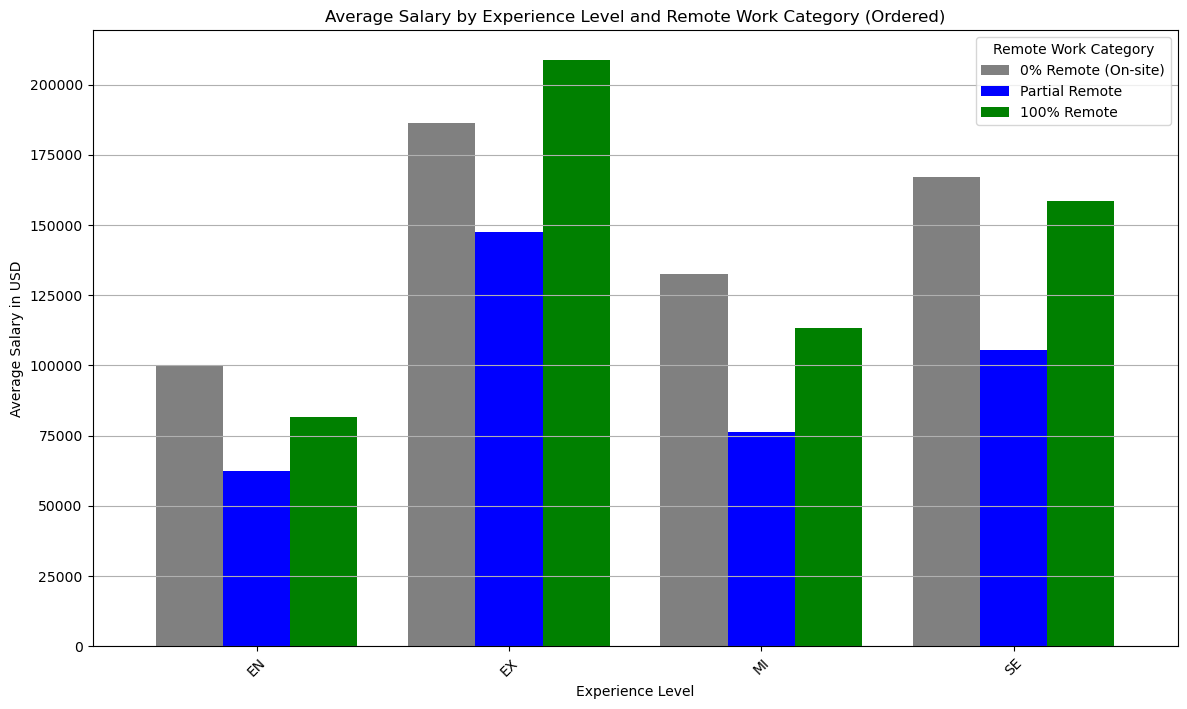

In [8]:
# Adjusting the previous categorization function back to the original three categories
data['remote_category_ordered'] = data.apply(categorize_remote_ratio, axis=1)

# Ensuring the order of categories is 0% Remote, Partial Remote, 100% Remote for the visualization
# This requires manually setting the order in the groupby operation
categories_order = ['0% Remote (On-site)', 'Partial Remote', '100% Remote']
data['remote_category_ordered'] = pd.Categorical(data['remote_category_ordered'], categories=categories_order, ordered=True)

# Recalculating the average salaries with the new ordered category
average_salaries_by_experience_ordered_remote = data.groupby(['experience_level', 'remote_category_ordered'])['salary_in_usd'].mean().unstack().fillna(0)

# Re-plotting with the specified order of remote categories
plt.figure(figsize=(14, 8))
average_salaries_by_experience_ordered_remote.plot(kind='bar', color=['grey', 'blue', 'green'], width=0.8, ax=plt.gca())

plt.title('Average Salary by Experience Level and Remote Work Category (Ordered)')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(title='Remote Work Category', labels=['0% Remote (On-site)', 'Partial Remote', '100% Remote'])

plt.show()


##Entry-Level Analyst Positions

#Finally, of personal interest, I wanted to see the average salary for entry level analyst positions, with remote ratios comparisons. First I filtered to all titles with analyst in the name, and then filtered to those positions that had data for no remote, hybrid, and fully remote positions.

#What is interesting to me is that the position that would seem to lend itself best to a hybrid foundation (Business Data Analyst) is the one the pays the most for the remote ratio. BI Data Analysts, on the other hand, seem to have no appreciable difference between the remote ratios.

In [10]:
# Assuming 'data' is your DataFrame containing the dataset
entry_level_analysts = data[(data['experience_level'] == 'EN') & data['job_title'].str.contains('Analyst', case=False)]

# Grouping by job title and remote work category, then calculating average salary
average_salaries_specific_analysts_by_remote = entry_level_analysts.groupby(['job_title', 'remote_category'])['salary_in_usd'].mean().unstack().fillna(0)


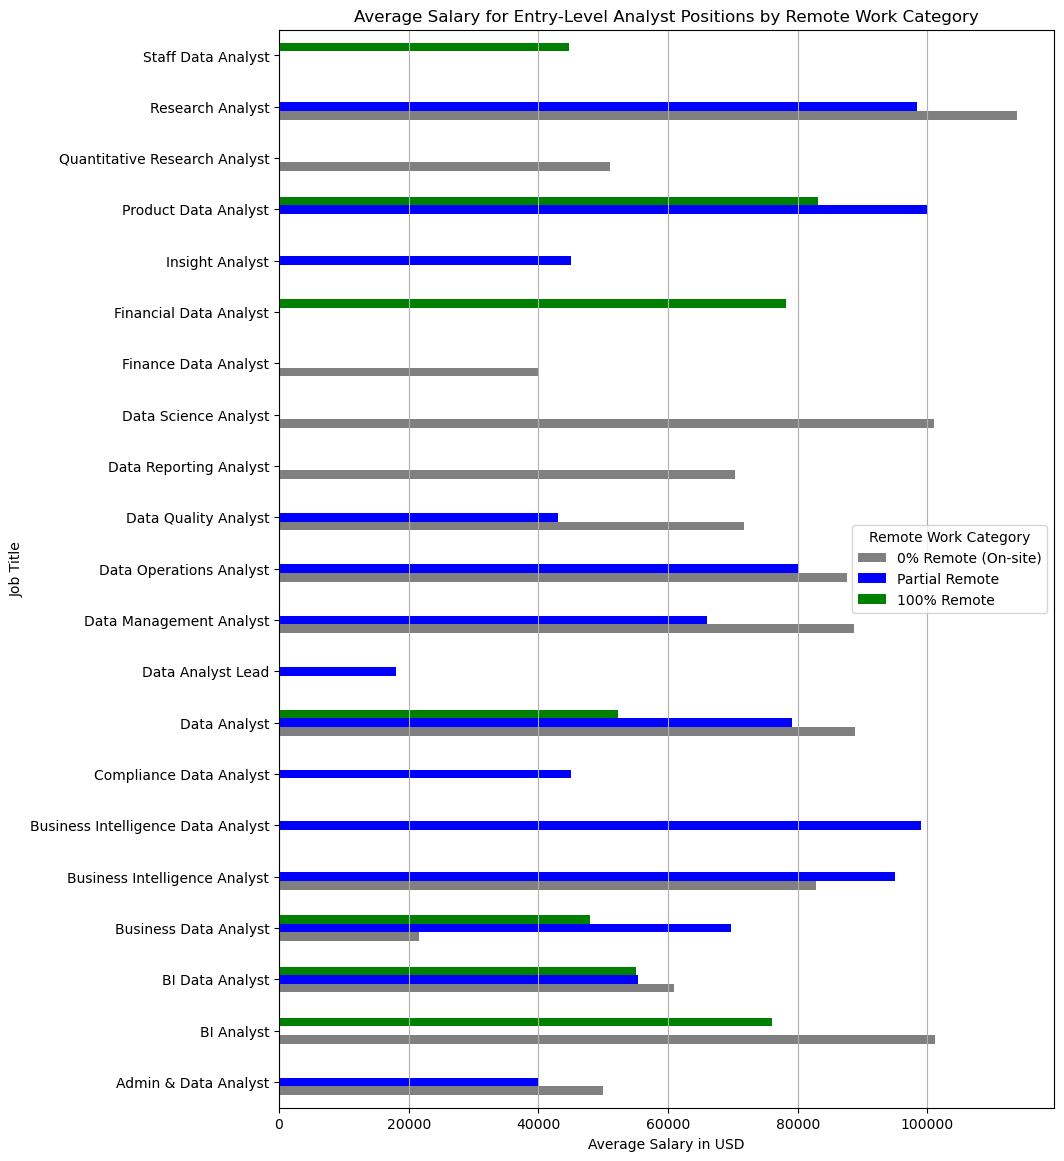

In [11]:
# Plotting horizontally
fig, ax = plt.subplots(figsize=(10, 14))
average_salaries_specific_analysts_by_remote.plot(kind='barh', color=['grey', 'blue', 'green'], ax=ax)

plt.title('Average Salary for Entry-Level Analyst Positions by Remote Work Category')
plt.ylabel('Job Title')
plt.xlabel('Average Salary in USD')
plt.grid(axis='x')
plt.legend(title='Remote Work Category', labels=['0% Remote (On-site)', 'Partial Remote', '100% Remote'])

plt.show()


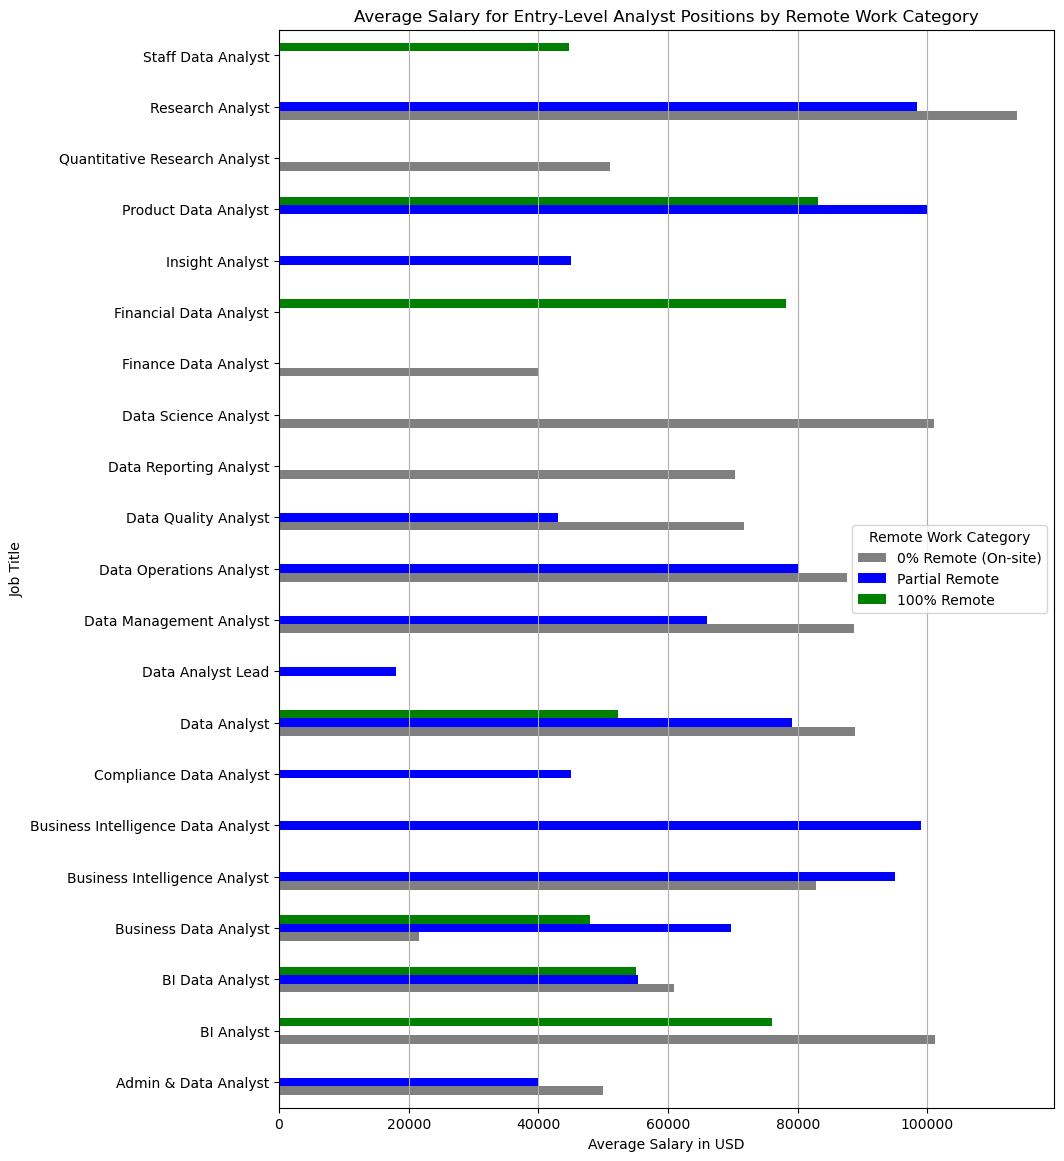

In [12]:
# Re-plotting the average salaries for specific analyst positions by remote category horizontally
fig, ax = plt.subplots(figsize=(10, 14))
average_salaries_specific_analysts_by_remote.plot(kind='barh', color=['grey', 'blue', 'green'], ax=ax)

plt.title('Average Salary for Entry-Level Analyst Positions by Remote Work Category')
plt.ylabel('Job Title')
plt.xlabel('Average Salary in USD')
plt.grid(axis='x')
plt.legend(title='Remote Work Category', labels=['0% Remote (On-site)', 'Partial Remote', '100% Remote'])

plt.show()


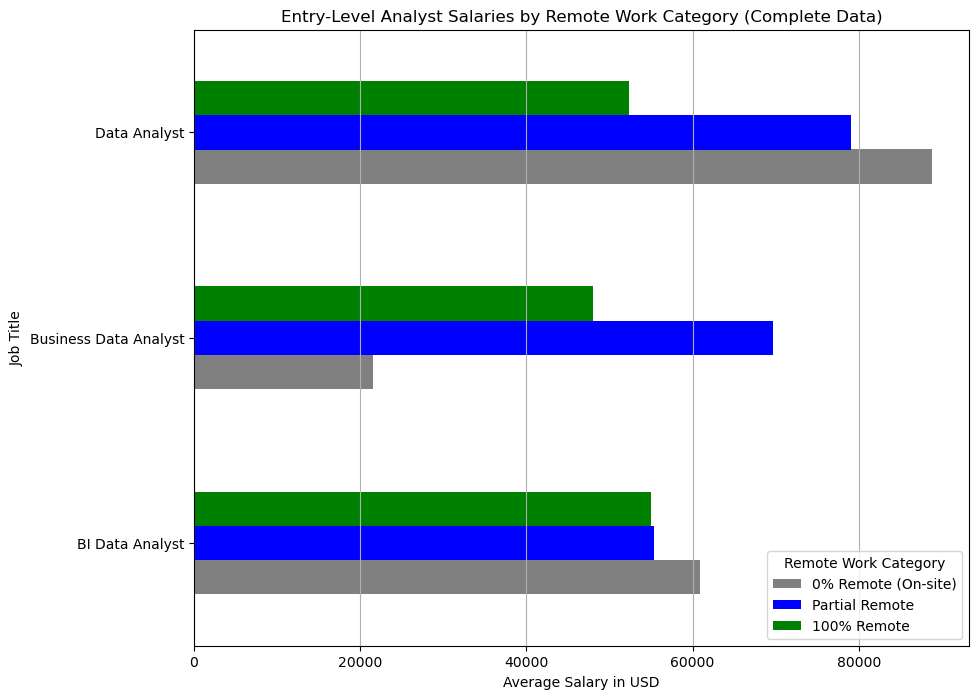

In [13]:
# Filter for job titles that have non-zero values in all three remote categories
filtered_analysts_by_remote = average_salaries_specific_analysts_by_remote[(average_salaries_specific_analysts_by_remote > 0).all(axis=1)]

# Now plotting only those positions with data available for all three remote work categories
fig, ax = plt.subplots(figsize=(10, 8))
filtered_analysts_by_remote.plot(kind='barh', color=['grey', 'blue', 'green'], ax=ax)

plt.title('Entry-Level Analyst Salaries by Remote Work Category (Complete Data)')
plt.ylabel('Job Title')
plt.xlabel('Average Salary in USD')
plt.grid(axis='x')
plt.legend(title='Remote Work Category', labels=['0% Remote (On-site)', 'Partial Remote', '100% Remote'])

plt.show()
